# Portfolio Optimization - Data Exploration

This notebook explores the initial data collection and portfolio optimization implementation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from portfolio_optimization.data import DataCollector
from portfolio_optimization.optimization import PortfolioOptimizer

# Set up plotting style
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = [12, 6]  # Larger default figure size
plt.rcParams['axes.grid'] = True          # Always show grid
plt.rcParams['axes.spines.top'] = False   # Remove top spine
plt.rcParams['axes.spines.right'] = False # Remove right spine
sns.set_palette('husl')                   # Set color palette

## 1. Data Collection and Preprocessing

In [2]:
# Initialize data collector with config file
data_collector = DataCollector()

# Get list of stocks and ETFs from config
tickers = data_collector.config['universe']['stocks'] + data_collector.config['universe']['etfs']

# Fetch and process data
data = data_collector.process_data(tickers)
prices = data['prices']
returns = data['returns']['daily']

print(f"Data shape: {returns.shape}\n")
print("First few rows of returns:")
returns.head()

Successfully fetched data for AAPL
Successfully fetched data for MSFT
Successfully fetched data for GOOGL
Successfully fetched data for AMZN
Successfully fetched data for META
Successfully fetched data for NVDA
Successfully fetched data for AGG
Successfully fetched data for DBC
Successfully fetched data for UUP
Data shape: (2922, 9)

First few rows of returns:


,AAPL,MSFT,GOOGL,AMZN,META,NVDA,AGG,DBC,UUP
Date,,,,,,,,,
2012-05-21,0.058260,0.016399,0.022835,0.019921,-0.109861,0.017384,-0.000180,0.013323,-0.003117
2012-05-22,-0.007679,0.000336,-0.021674,-0.012746,-0.089039,-0.012205,-0.002432,-0.014275,0.010273
2012-05-23,0.024400,-0.021841,0.014414,0.009056,0.032258,0.024712,0.001174,-0.011052,0.003537
2012-05-24,-0.009184,-0.001374,-0.009517,-0.009389,0.032187,-0.026528,-0.000812,0.000385,0.003965
2012-05-25,-0.005360,-0.000344,-0.020094,-0.010918,-0.033908,0.023947,0.001534,0.003467,0.001316


### Data Quality Checks

In [3]:
# Check for missing values
print("Missing values:")
print(returns.isnull().sum())

# Calculate basic statistics
print("\nBasic statistics:")
stats = returns.describe()
display(stats)

Missing values:
AAPL     0
MSFT     0
GOOGL    0
AMZN     0
META     0
NVDA     0
AGG      0
DBC      0
UUP      0
dtype: int64

Basic statistics:


,AAPL,MSFT,GOOGL,AMZN,META,NVDA,AGG,DBC,UUP
count,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000
mean,0.001011,0.001089,0.000909,0.001116,0.001082,0.002159,0.000065,0.000026,0.000109
std,0.017896,0.016751,0.017078,0.020377,0.025280,0.027820,0.003072,0.010764,0.004496
min,-0.128647,-0.147390,-0.116342,-0.140494,-0.263901,-0.187559,-0.040011,-0.079444,-0.032070
25%,-0.007520,-0.006784,-0.007092,-0.008733,-0.010045,-0.011048,-0.001307,-0.005684,-0.002456
50%,0.000889,0.000734,0.000784,0.000935,0.000999,0.001937,0.000178,0.000625,0.000000
75%,0.010316,0.009481,0.009239,0.011422,0.012825,0.015150,0.001502,0.005959,0.002729
max,0.119808,0.142169,0.162584,0.141311,0.296115,0.298067,0.023721,0.047990,0.037821


## 2. Exploratory Data Analysis

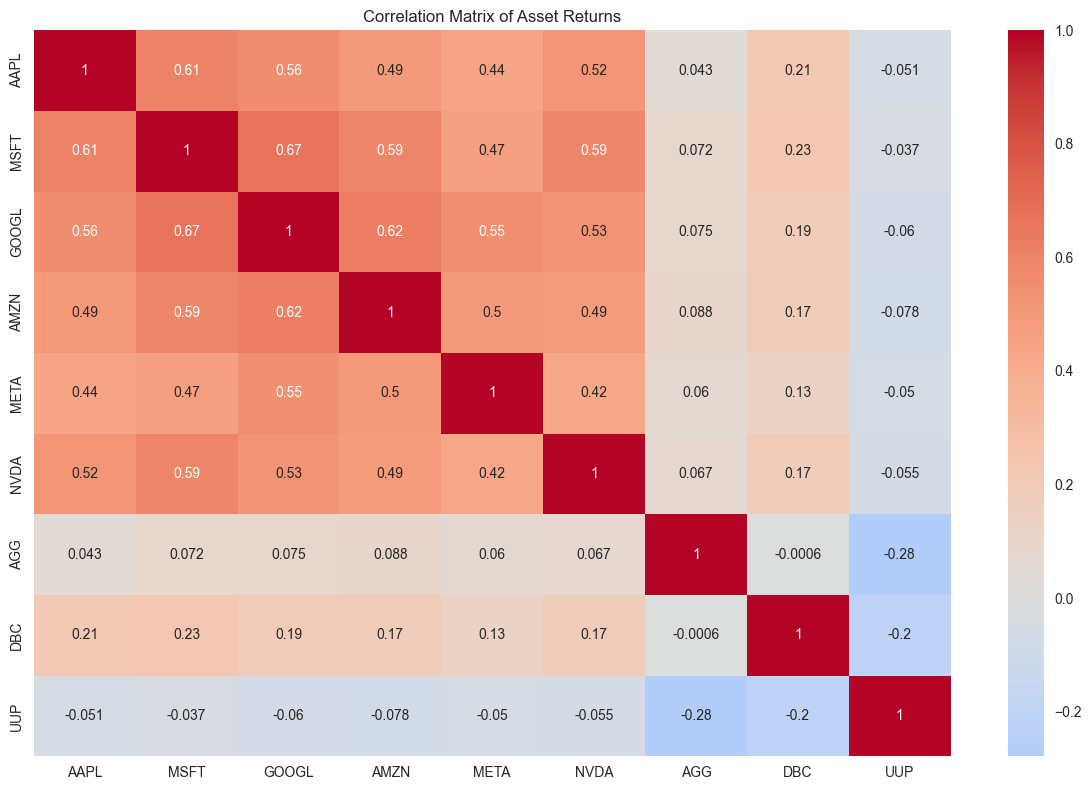

In [4]:
# Plot correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(returns.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Asset Returns')
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

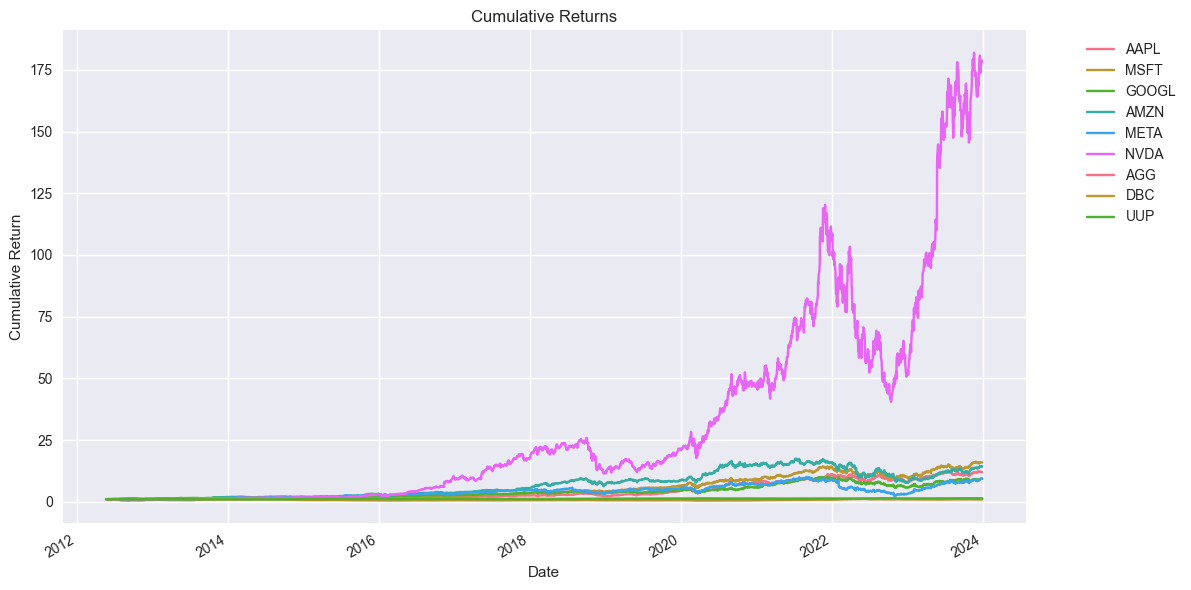

In [5]:
# Plot cumulative returns
cumulative_returns = (1 + returns).cumprod()
plt.figure(figsize=(12, 6))
cumulative_returns.plot()
plt.title('Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/var/folders/3s/m0cz_jjn4fqfdv71rvtl6bpr0000gn/T/ipykernel_55790/2864142405.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


<Figure size 1200x600 with 0 Axes>

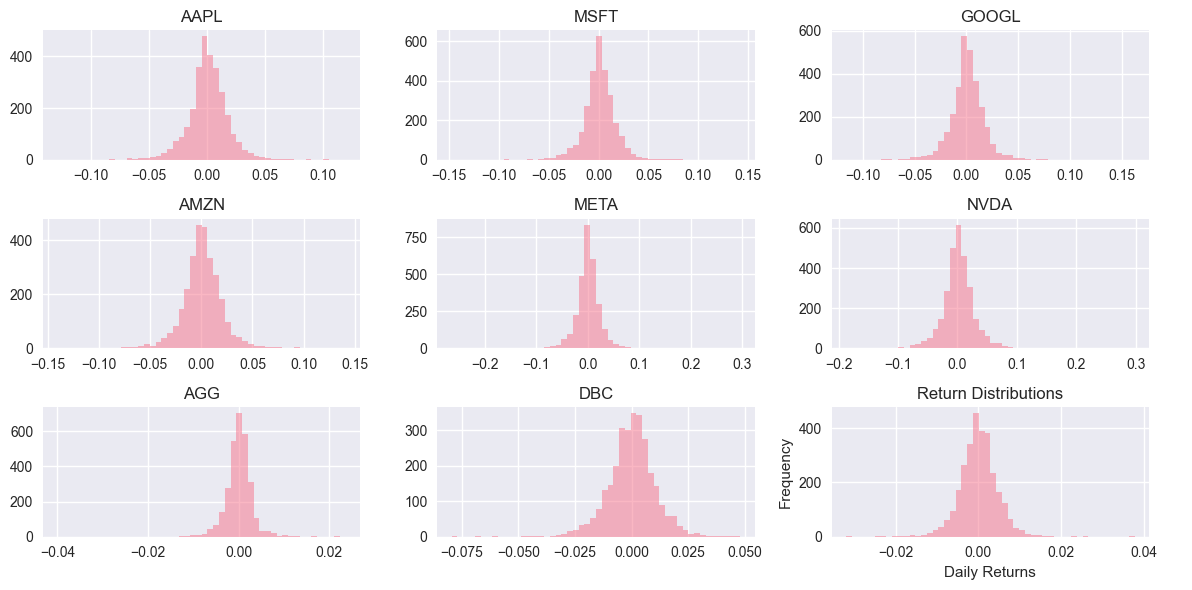

In [6]:
# Plot return distributions
plt.figure(figsize=(12, 6))
returns.hist(bins=50, alpha=0.5)
plt.title('Return Distributions')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## 3. Portfolio Optimization

In [7]:
# Initialize optimizer with the data
optimizer = PortfolioOptimizer()

# Generate efficient frontier
ef = optimizer.generate_efficient_frontier(returns, verbose=False)



Found 4 similar points in the efficient frontier
Keeping 46 unique points


<Figure size 1200x600 with 0 Axes>

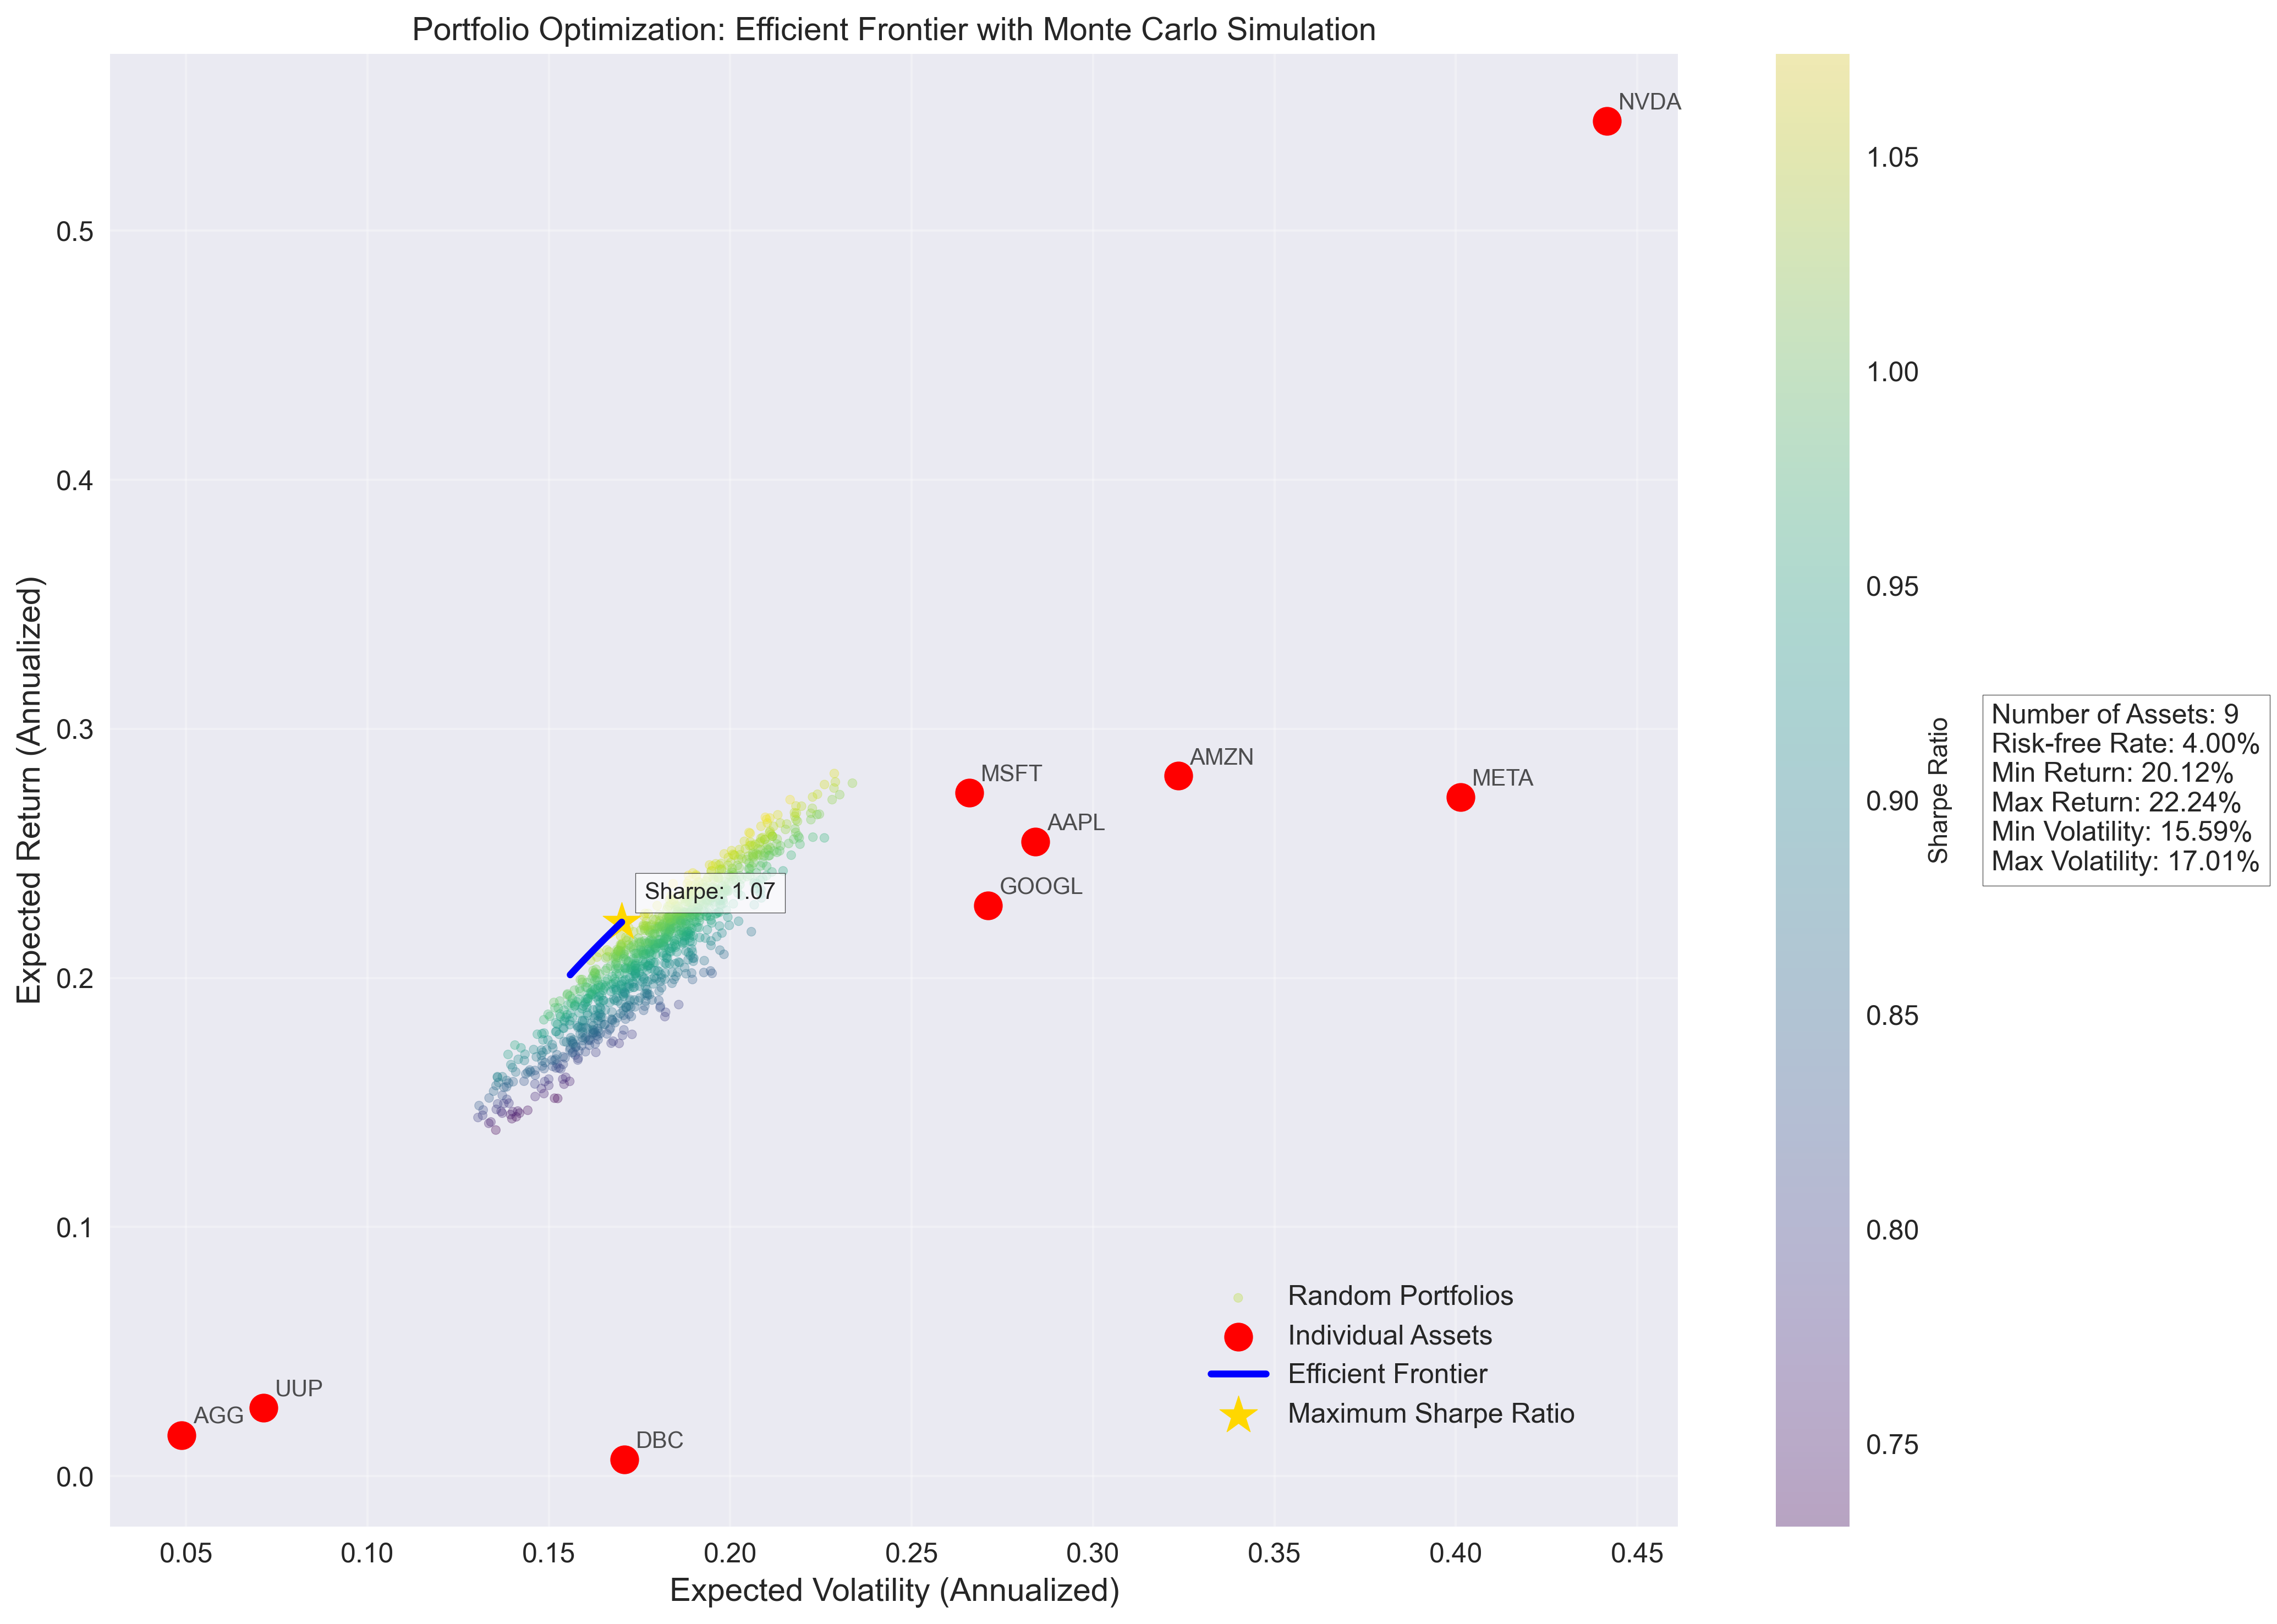

In [11]:
# Plot efficient frontier
fig = optimizer.plot_efficient_frontier(ef, show_sharpe=True, show_assets=True, returns=returns, show_plot=True);


Selected portfolios metrics:

Portfolio 1:
Return: 20.12%
Volatility: 15.59%
Sharpe Ratio: 1.03

Weights:
AAPL: 10.75%
MSFT: 16.67%
GOOGL: 2.42%
AMZN: 7.58%
META: 0.92%
NVDA: 16.67%
AGG: 16.67%
DBC: 11.67%
UUP: 16.67%

Portfolio 2:
Return: 20.67%
Volatility: 15.94%
Sharpe Ratio: 1.05

Weights:
AAPL: 11.70%
MSFT: 16.67%
GOOGL: 2.73%
AMZN: 8.29%
META: 1.08%
NVDA: 16.67%
AGG: 16.67%
DBC: 9.53%
UUP: 16.67%

Portfolio 3:
Return: 21.15%
Volatility: 16.26%
Sharpe Ratio: 1.06

Weights:
AAPL: 12.56%
MSFT: 16.67%
GOOGL: 3.00%
AMZN: 8.92%
META: 1.23%
NVDA: 16.67%
AGG: 16.67%
DBC: 7.62%
UUP: 16.67%

Portfolio 4:
Return: 21.72%
Volatility: 16.64%
Sharpe Ratio: 1.06

Weights:
AAPL: 13.55%
MSFT: 16.67%
GOOGL: 3.32%
AMZN: 9.65%
META: 1.40%
NVDA: 16.67%
AGG: 16.67%
DBC: 5.42%
UUP: 16.67%

Portfolio 5:
Return: 22.24%
Volatility: 17.01%
Sharpe Ratio: 1.07

Weights:
AAPL: 14.47%
MSFT: 16.67%
GOOGL: 3.62%
AMZN: 10.34%
META: 1.55%
NVDA: 16.67%
AGG: 16.67%
DBC: 3.34%
UUP: 16.67%


<Figure size 1200x600 with 0 Axes>

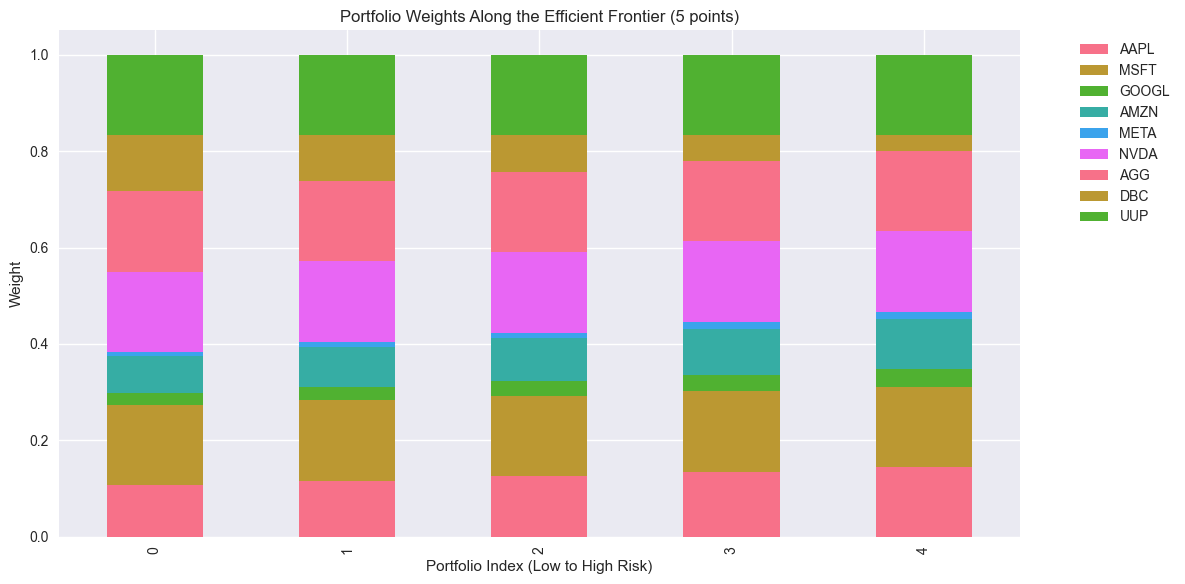

In [13]:
# Plot portfolio weights for selected points
optimizer.plot_portfolio_weights(ef, n_points=5, show_plot=True);